#### 1. Implement BFS and DFS and use a graph of at least 10 nodes and at least 15 edges to demonstrate.


In [1]:
#Import the required packages

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(f"networkx version: {nx.__version__}")

networkx version: 2.4


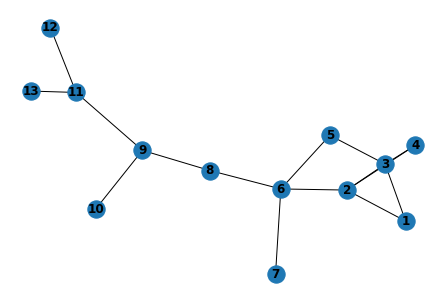

In [24]:
# Creating a Graph
G = nx.Graph()
# Adding nodes to graph
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)
G.add_node(10)
G.add_node(11)
G.add_node(12)
G.add_node(13)
# Adding 15 weighted edges to graph
G.add_edge(1, 2, weight=2)
G.add_edge(2, 3, weight=2)
G.add_edge(11, 9, weight=3)
G.add_edge(11, 12, weight=3)
G.add_edge(3, 4, weight=2)
G.add_edge(1, 3, weight=2)
G.add_edge(2, 4, weight=2)
G.add_edge(3, 5, weight=2)
G.add_edge(5, 6, weight=2)
G.add_edge(6, 7, weight=2)
G.add_edge(2, 6, weight=5)
G.add_edge(8, 6, weight=5)
G.add_edge(8, 9, weight=5)
G.add_edge(9, 10, weight=2)#12
G.add_edge(13, 11, weight=5)

np.random.seed(450)
nx.draw(G, with_labels=True, font_weight='bold')

In [3]:
#Adjacency data of the graph
adj_data = nx.adjacency_data(G)['adjacency']
adj_data

[[{'weight': 2, 'id': 2}, {'weight': 2, 'id': 3}],
 [{'weight': 2, 'id': 1},
  {'weight': 2, 'id': 3},
  {'weight': 2, 'id': 4},
  {'weight': 5, 'id': 6}],
 [{'weight': 2, 'id': 2},
  {'weight': 2, 'id': 4},
  {'weight': 2, 'id': 1},
  {'weight': 2, 'id': 5}],
 [{'weight': 2, 'id': 3}, {'weight': 2, 'id': 2}],
 [{'weight': 2, 'id': 3}, {'weight': 2, 'id': 6}],
 [{'weight': 2, 'id': 5},
  {'weight': 2, 'id': 7},
  {'weight': 5, 'id': 2},
  {'weight': 5, 'id': 8}],
 [{'weight': 2, 'id': 6}],
 [{'weight': 5, 'id': 6}, {'weight': 5, 'id': 9}],
 [{'weight': 3, 'id': 11}, {'weight': 5, 'id': 8}, {'weight': 2, 'id': 10}],
 [{'weight': 2, 'id': 9}],
 [{'weight': 3, 'id': 9}, {'weight': 3, 'id': 12}, {'weight': 5, 'id': 13}],
 [{'weight': 3, 'id': 11}],
 [{'weight': 5, 'id': 11}]]

In [4]:
# Adjacency list representation of graph without weights for search
def graph_to_adj_list(adj_data):
    # Using a Python dictionary to act as an adjacency list
    adj_list = {}
    key = 1
    for line in adj_data:
        values = [str(l['id']) for l in line]
        adj_list[str(key)] = values
        key += 1
    return adj_list

In [5]:
# We need Adjacency list representation of graph to search and operate on graph
adj_list = graph_to_adj_list(adj_data)
adj_list

{'1': ['2', '3'],
 '2': ['1', '3', '4', '6'],
 '3': ['2', '4', '1', '5'],
 '4': ['3', '2'],
 '5': ['3', '6'],
 '6': ['5', '7', '2', '8'],
 '7': ['6'],
 '8': ['6', '9'],
 '9': ['11', '8', '10'],
 '10': ['9'],
 '11': ['9', '12', '13'],
 '12': ['11'],
 '13': ['11']}

In [6]:
# Implementing BFS function
def bfs(visited, graph, node):
    # array to return with traverse order
    array = []
    node = str(node)
    
    visited.append(node)
    queue.append(node)

    while queue:
        s = queue.pop(0) 
#         print (s, end = " ") 
        array.append(int(s))

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return array
                
# List to keep track of visited nodes.
visited = []
# Initialize a queue
queue = []
# calling bfs funtion
print(bfs(visited, adj_list,1))

[1, 2, 3, 4, 6, 5, 7, 8, 9, 11, 10, 12, 13]


In [7]:
# Implementing DFS function
def dfs(visited, graph, node):
    node = str(node)
    if node not in visited:
        print(node, end = " ")
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
            
# Set to keep track of visited nodes.
visited = set()
# calling dfs funtion
dfs(visited, adj_list, 1)

1 2 3 4 5 6 7 8 9 11 12 13 10 

#### 2. Implement a code that uses BFS or DFS to find connected components in a graph. Also, find the length of largest and second largest connected component. Use a graph that has at least 4 components to demonstrate your code.


In [8]:
# Graph building function
import random
def build_graph(nodes, edges):
    G = nx.Graph()
    G.add_nodes_from(nodes) # Add nodes from an iterable data structure
    G.add_edges_from(edges)
    return G

In [9]:
# creating the nodes for graph 
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] #14 nodes
# creating the edges list
edges = [(1,2),(3,5),(2,6),(7,8),(8,9),(11,7),(9,11),(3,10),(4,12),(5,13),(13,3),(14,13)] # 4 connected componentes
# building graph with nodes and edges by Graph building function
Graph2 = build_graph(nodes, edges)
type(Graph2)

networkx.classes.graph.Graph

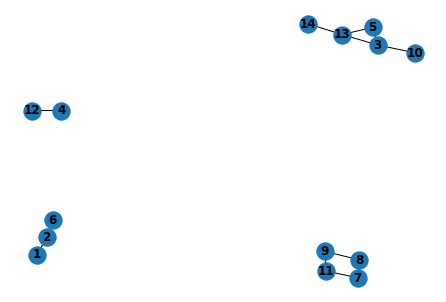

In [10]:
#showing the graph with multiple components
nx.draw(Graph2, with_labels=True, font_weight='bold')

In [11]:
#Adjacency data of graph
adj_data = nx.adjacency_data(Graph2)['adjacency']

# Adjacency list representation of graph to search and operate on graph
adj_list = graph_to_adj_list(adj_data)

In [12]:
# Set to keep track of visited nodes.
vistedComponentsNode = set()
# A dictionary to keep the components
components = {}

In [13]:
for node in nodes:
    # We will add the visted nodes in vistedComponentsNode 
    # If a node is not present in the vistedComponentsNode set then
    # we will find the connected component using bfs and add all it's nodes to the set 
    if node not in vistedComponentsNode:
        # List to keep track of component visited nodes.
        visited = []
        # Initialize a queue
        queue = []
        # we are using bfs to find the all nodes of the connected component
        # calling bfs funtion
        component = bfs(visited, adj_list,node)
        # adding the connected component to dictionary with its length
        components[len(component)] = component
        #adding all the values of the component to the set
        vistedComponentsNode = vistedComponentsNode.union(set(component))
#         print(vistedComponentsNode)
        
# print(vistedComponentsNode)
# components

In [14]:
#finding the largest and second largest
counts = list(components.keys())
largest = max(counts)
counts.remove(largest)
secondLargest = max(counts)
# using nx.connected_components to find the max length component
# largest_cc = max(nx.connected_components(Graph2), key=len)
# largest_cc
# arr = [len(c) for c in sorted(nx.connected_components(Graph2), key=len, reverse=True)]
# arr

In [15]:
print(f"Number of connected components in the graph is {len(components)} \n")
print(f"Length of the largest component is {largest} \n and the component is {components[largest]} \n")
print(f"Length of the second largest component is {secondLargest} \n and the component is {components[secondLargest]} \n")

Number of connected components in the graph is 4 

Length of the largest component is 5 
 and the component is [3, 5, 10, 13, 14] 

Length of the second largest component is 4 
 and the component is [7, 8, 11, 9] 



#### 3. Implement Dijkstras algorithm and demonstrate in the above graph to find the diameter of the graph. Diameter of the graph is the longest path among the shortest paths between any two vertices. Draw the graph and highlight the diameter in the graph. 


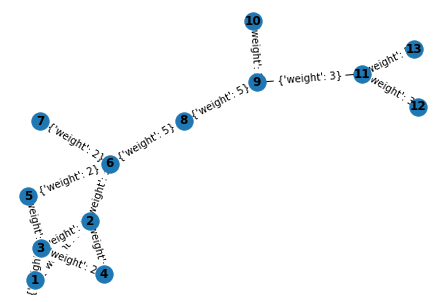

In [16]:
# Showing the weighted graph
pos = nx.spring_layout(G, scale=3)
nx.draw(G, pos,with_labels=True, font_weight='bold')
edge_labels = nx.get_edge_attributes(G,'r')
nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)
plt.show()

In [17]:
#Adjacency data of the graph
adj_data = nx.adjacency_data(G)['adjacency']
adj_data

[[{'weight': 2, 'id': 2}, {'weight': 2, 'id': 3}],
 [{'weight': 2, 'id': 1},
  {'weight': 2, 'id': 3},
  {'weight': 2, 'id': 4},
  {'weight': 5, 'id': 6}],
 [{'weight': 2, 'id': 2},
  {'weight': 2, 'id': 4},
  {'weight': 2, 'id': 1},
  {'weight': 2, 'id': 5}],
 [{'weight': 2, 'id': 3}, {'weight': 2, 'id': 2}],
 [{'weight': 2, 'id': 3}, {'weight': 2, 'id': 6}],
 [{'weight': 2, 'id': 5},
  {'weight': 2, 'id': 7},
  {'weight': 5, 'id': 2},
  {'weight': 5, 'id': 8}],
 [{'weight': 2, 'id': 6}],
 [{'weight': 5, 'id': 6}, {'weight': 5, 'id': 9}],
 [{'weight': 3, 'id': 11}, {'weight': 5, 'id': 8}, {'weight': 2, 'id': 10}],
 [{'weight': 2, 'id': 9}],
 [{'weight': 3, 'id': 9}, {'weight': 3, 'id': 12}, {'weight': 5, 'id': 13}],
 [{'weight': 3, 'id': 11}],
 [{'weight': 5, 'id': 11}]]

In [18]:
# Adjacency list representation of graph G
def graph_to_adj_list(adj_data):
  # Using a Python dictionary to act as an adjacency list
    adj_list = {}
    key = 1
    for line in adj_data:
        newDict = {}
        for l in line:
            newDict[l['id']] = l['weight']
        adj_list[key] = newDict
        key += 1
    return adj_list

In [19]:
# We need Adjacency list representation of graph with weights
adj_list = graph_to_adj_list(adj_data)
adj_list

{1: {2: 2, 3: 2},
 2: {1: 2, 3: 2, 4: 2, 6: 5},
 3: {2: 2, 4: 2, 1: 2, 5: 2},
 4: {3: 2, 2: 2},
 5: {3: 2, 6: 2},
 6: {5: 2, 7: 2, 2: 5, 8: 5},
 7: {6: 2},
 8: {6: 5, 9: 5},
 9: {11: 3, 8: 5, 10: 2},
 10: {9: 2},
 11: {9: 3, 12: 3, 13: 5},
 12: {11: 3},
 13: {11: 5}}

In [20]:
import sys
# Implementing dijkstra algorithm
def dijkstra(graph,start,end,visited=[],distances={},predecessors={}):
    """Find the shortest path btw start & end nodes in a graph"""
    # detect if first time through, set current distance to zero
    if not visited: distances[start]=0
    
    # if we've found our end node, find the path to it, and return
    if start==end:
        path=[]
        path_distances = []
        while end != None:
            path.append(end)
            path_distances.append(distances[end])
            end=predecessors.get(end,None)
        return distances[start], path[::-1], path_distances[::-1]
    
    # process neighbors as per algorithm, keep track of predecessors
    for neighbor in graph[start]:
        if neighbor not in visited:
            neighbordist = distances.get(neighbor,float('inf'))
            tentativedist = distances[start] + graph[start][neighbor]
            if tentativedist < neighbordist:
                distances[neighbor] = tentativedist
                predecessors[neighbor]=start
    
    # neighbors processed, now mark the current node as visited 
    visited.append(start)
    
    # finds the closest unvisited node to the start 
    unvisiteds = dict((k, distances.get(k,float('inf'))) for k in graph if k not in visited)
    closestnode = min(unvisiteds, key=unvisiteds.get)
    # now take the closest node and recurse, making it current 
    return dijkstra(graph,closestnode,end,visited,distances,predecessors)


In [21]:
# Creating minDistances dictionary
minDistances = {}
# nodes of the graph
keys =list(adj_list.keys())
# traversing through every vertices
for key in keys:
    for key2 in keys:
        try:
            #Calling the dijkstra every vertices
            length, path, distances = dijkstra(adj_list,1,key2)
            #Storing the lenght and path of the vertices in minDistances dictionary
            minDistances[length] = path
        except:
            continue
#Diameter of the graph is the longest path among the shortest paths between any two vertices
diameter = max(minDistances)
print("Diameter: ",diameter,end="\n\n")
path = minDistances[diameter]
print("Path: ",path,end="\n\n")

Diameter:  24

Path:  [1, 3, 5, 6, 8, 9, 11, 13]



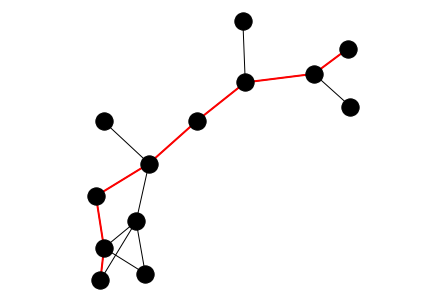

In [22]:
# Showing the graph diameter the Diameter is calculated based on the weighted graph
nx.draw(G,pos,node_color='k')
# draw path in red
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=2)
# nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)
plt.axis('equal')
plt.show()